# Creating a new Machine Scoring Method
Hello!  This in Matt's quick tutorial on how to create and implement a new direct scoring method and then testing it on a target.

## Step 1: Load nessecary modules

In [1]:
# Add python modules
import numpy as np
import matplotlib.pyplot as plt

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 2: Load Target Info class
Needed for loading the target image and running through models later.

In [2]:
tDir = '../targetDir'
print('Before: \'%s\' \nAfter: \'%s\'' % (tDir,gm.validPath(tDir) ))
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=True)
if tInfo.status == False:
    print("WARNING")
else:
    print("Target Good!")

Before: '../targetDir' 
After: '/home/mbo2d/587722984435351614/'
IM: target_info_class.__init__:
	 - targetDir:  /home/mbo2d/587722984435351614/
IM: Target.initTargetDir():
	 - targetDir: /home/mbo2d/587722984435351614/
NEW PATH EXISTS: /home/mbo2d/587722984435351614/zoo_merger_models/
	 - targetDir: (True) /home/mbo2d/587722984435351614/
	 - infoDir: (True) /home/mbo2d/587722984435351614/information/
	 - baseInfoLoc: (True) /home/mbo2d/587722984435351614/information/base_target_info.json
	 - allInfoLoc: (True) /home/mbo2d/587722984435351614/information/target_info.json
	 - zooMergerDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/
	 - plotDir: (True) /home/mbo2d/587722984435351614/plots/
IM: Target: Opening target info json
Target Good!


---
## Step 3: Load a run info class.
Needed for loading a model image and testing later

In [3]:

print(tInfo.get('zoo_merger_models').get('00001'))

rId = 'r00001'
runArg = gm.inArgClass()
runArg.setArg("printAll",True)
runArg.setArg("tInfo",tInfo)

rInfo = tInfo.getRunInfo( rID=rId, rArg = runArg )
rInfo.tInfo = tInfo

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))
    print(rInfo.get('tInfo').status)

None
IM: run_info_class.__init__
	 - runDir:  /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/
IM: run.initRunDir
	 - runDir: /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/
	 - runDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/
	 - ptsDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/particle_files/
	 - imgDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/model_images/
	 - miscDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/misc_images/
	 - infoLoc: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/info.json
	 - baseLoc: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/base_info.json
	 - Reading Info file.
IM: Run.__init__: Initalized: True
Run 'r00001' Good!
True


---
## Step 4: Load score parameter file
For loading in the the new score parameter file.  You can edit this file as you see fit

In [5]:
# If you need to create a brand new json score parameter
from copy import deepcopy
pLoc = gm.validPath('../param/new_score.json')
print(pLoc,'\n')
oldParams = im.group_score_parameter_class(pLoc = pLoc)
params = oldParams.group
gm.pprint(params)

params['new_score'] = deepcopy( params['new_score'] )
params['new_score']['name'] = 'new_score'
params['new_score']['cmpArg']['cmpMethod'] = 'test_compare'
gm.pprint(params)

newParamClass = im.group_score_parameter_class( params = params )
#newParams.saveParam( saveLoc = '../param/new_score.json')
new_params = newParamClass.group



/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/galaxyJSPAM/param/new_score.json 

{'new_score': {'cmpArg': {'cmpMethod': 'test_compare'},
               'imgArg': {'name': 'default',
                          'pType': 'default'},
               'name': 'new_score',
               'scoreType': 'target',
               'simArg': {'nPts': '100k',
                          'name': '100k'},
               'targetName': 'zoo'}}
{'new_score': {'cmpArg': {'cmpMethod': 'test_compare'},
               'imgArg': {'name': 'default',
                          'pType': 'default'},
               'name': 'new_score',
               'scoreType': 'target',
               'simArg': {'nPts': '100k',
                          'name': '100k'},
               'targetName': 'zoo'}}


___
## Step 5: Load image for comparison
Load in the target image and a model image for initial comparison

IM: Loading imgLoc: default False


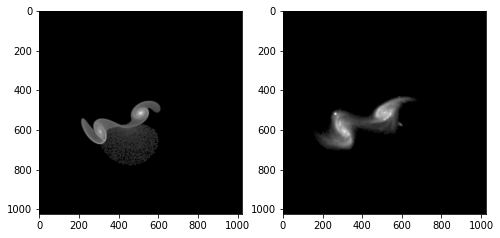

In [6]:
img1 = rInfo.getModelImg( params['new_score']['imgArg']['name'] )
img2 = tInfo.getTargetImage( params['new_score']['targetName'] )

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.subplot(122)
plt.imshow(img2, cmap='gray')

___
## Step 6: Create the new comparison function!
Note: All direct image comparison take 3 arguments
- 2x images of the same size
- dict of comparison arguments

In [7]:
# Test new scoring method on 2 images directly
from skimage.metrics import structural_similarity as ssim

def score_ssim( img1, img2, cmpArg ):
    score = -1
    score = ssim( img1, img2 )
    return score

score = score_ssim( img1, img2, None )

print(score)

0.9128633914893991


___
## Step 7: Load new function into direct image module
This will allow the existing code to run the function in a standard new score operation.

In [8]:
# Assign new function to test function in direct image compare
dc.set_test_compare(score_ssim)

# Check if all modules loaded the same function
print("NOTE! All should match")
print('nb:   ',score_ssim)
print('dc:   ',dc.test_compare)
print('ms:   ',ms.dc.test_compare)
print('simr: ',simr.ms.dc.test_compare)


New Score Function:  <function score_ssim at 0x7fb4e950c280>
NOTE! All should match
nb:    <function score_ssim at 0x7fb4e950c280>
dc:    <function score_ssim at 0x7fb4e950c280>
ms:    <function score_ssim at 0x7fb4e950c280>
simr:  <function score_ssim at 0x7fb4e950c280>


___
## Step 8: Execute new score operation for a single model.
This confirms that the score function operates correcting in the new score pipeline

In [9]:
newRunScoreArg = gm.inArgClass()
newRunScoreArg.setArg( 'rInfo', rInfo )
newRunScoreArg.setArg( 'scoreParams', new_params )
newRunScoreArg.setArg( 'printAll', True )
newRunScoreArg.setArg( 'newScore', True )
newRunScoreArg.setArg( 'overWrite', True )

simr.simr_run( rInfo = rInfo, arg = newRunScoreArg )
#print(rInfo.get('machine_scores'))

SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7fb5248d6670>
MS: Run:
MS: scoreName: new_score
MS: target_image_compare: new_score
	 -  paramName: new_score
	 -  modelName: default
	 - targetName: zoo
	 - Read target image
IM: Loading imgLoc: default False
MS: run: Read model image
IM: Run.saveInfoFile: Saving info data file...
MS: New Score!: new_score - 0.912863 - 0.912863


___
## Step 9: Execute new score operation for a complete target.
Execute the new function for a target and see if it works across many models

In [10]:
newTarget = gm.inArgClass()
newTarget.setArg( 'tInfo', tInfo )
newTarget.setArg( 'paramLoc', '../param/new_score.json' )
newTarget.setArg( 'printAll', False )
#newTarget.setArg( 'newScore', True )
#newTarget.setArg( 'overWrite', True )

simr.simr_target( arg=newTarget )

SIMR: pipelineTarget: input
	 - tDir: None
	 - tInfo: <class 'NoneType'>
SIMR: simr_target status:
	 - tInfo.status: True


***
## Step 10: View results!
View if your new method does well or not.

<AxesSubplot:title={'center':'new_score:\nCorr: -0.1663'}, xlabel='zoo_merger_score', ylabel='new_score'>

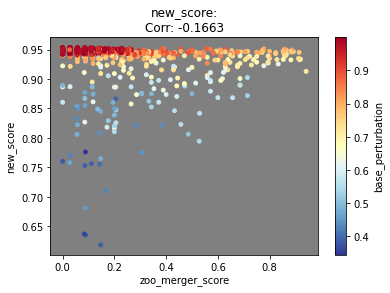

In [11]:
scores = tInfo.getScores()
sa.getNamedPlot(scores)

___
## Step 11: Add new function to direct_image_comparison.py

## Step 12: Rename parameter and save
- Create a new dict of the new score parameter
    - Parameter name
    - cmpMethod name: Match name of function in directory_image_compare
   

In [12]:
param = deepcopy( new_params['new_score'] )
param['name'] = 'base0_ssim'
param['cmpArg']['cmpMethod'] = 'ssim'

gm.pprint(param)

{'cmpArg': {'cmpMethod': 'ssim'},
 'imgArg': {'name': 'default',
            'pType': 'default'},
 'name': 'base0_ssim',
 'scoreType': 'target',
 'simArg': {'nPts': '100k',
            'name': '100k'},
 'targetName': 'zoo'}


___
## Step 13: Save in a score parameter file

In [13]:
# Load existing score parameter file
pLoc = gm.validPath('../param/base0.json')
print(pLoc,'\n')
baseParamClass = im.group_score_parameter_class(pLoc = pLoc)

#gm.pprint(baseParams)

# Add new score parameter to dict
baseParamClass.group[ param['name'] ] = param
gm.pprint(baseParamClass.group)
baseParamClass.saveParam( saveLoc = '../param/base0.json' )


/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/galaxyJSPAM/param/base0.json 

{'base0_bcorr0': {'cmpArg': {'cmpMethod': 'binary_correlation'},
                  'imgArg': {'name': 'default',
                             'pType': 'default'},
                  'name': 'base0_bcorr0',
                  'scoreType': 'target',
                  'simArg': {'nPts': '100k',
                             'name': '100k'},
                  'targetName': 'zoo'},
 'base0_bcorr1': {'cmpArg': {'cmpMethod': 'binary_correlation',
                             'h1': 120,
                             'h2': 120},
                  'imgArg': {'name': 'default',
                             'pType': 'default'},
                  'name': 'base0_bcorr1',
                  'scoreType': 'target',
                  'simArg': {'nPts': '100k',
                             'name': '100k'},
                  'targetName': 'zoo'},
 'base0_bcorr2': {'cmpArg': {'cmpMethod': 'binary_correlation',
                          

___
## Step 14: Have target run the score parameter file you just updated

In [14]:
newTarget = gm.inArgClass()
newTarget.setArg( 'tInfo', tInfo )
newTarget.setArg( 'scoreParams', baseParamClass.group )
newTarget.setArg( 'printAll', False )
newTarget.setArg( 'newScore', True )
#newTarget.setArg( 'overWrite', True )

#gm.pprint(newTarget.get('scoreParams'))

simr.simr_target( arg=newTarget )

SIMR: pipelineTarget: input
	 - tDir: None
	 - tInfo: <class 'NoneType'>
SIMR: simr_target status:
	 - tInfo.status: True
SIMR: new_target_scores:
	 - tInfo: True
	 - Runs needing scores: 1293
100.0% - 1293 / 1293	  



IM: Target.gatherRunInfos.
GM: Printing Input arguments
	- printBase - <class 'bool'> :  True
	- printAll - <class 'bool'> :  False
	- nProc - <class 'int'> :  -1
	- simple - <class 'bool'> :  False
	- runDir - <class 'NoneType'> :  None
	- sdssDir - <class 'NoneType'> :  None
	- targetDir - <class 'NoneType'> :  None
	- dataDir - <class 'NoneType'> :  None

0.2% - 3 / 1293	  
0.6% - 8 / 1293	  
100.0% - 1293 / 1293	  






IM: Target.saveInfoFile():
	 - Saving target info file...
IM: Target.saveInfoFile():
	 - Saving target info file...
IM: Target.saveInfoFile():
	 - Saving target info file...


___
## Step 15: view target results of new score function! Again!

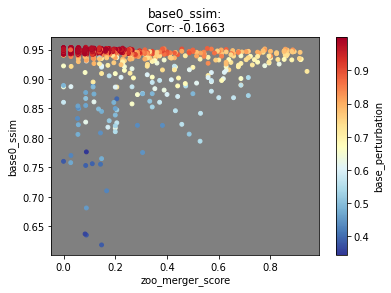

In [17]:
scores = tInfo.getScores()
ax = sa.getNamedPlot(scores, sName = 'base0_ssim' )